<a href="https://colab.research.google.com/github/kesar19051/ADA-Labs/blob/master/Food_Pairing_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


In [1]:
import pandas as pd 
import json
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns
import math
import random

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Understanding the dataset

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/RecipeDB/Recipe_small.csv") 
for col in df1.columns:
    print(col)

Recipe_id
Calories
cook_time
prep_time
servings
Recipe_title
total_time
url
Region
Sub_region
Continent
Source
img_url
Carbohydrate, by difference (g)
Energy (kcal)
Protein (g)
Total lipid (fat) (g)
Utensils
Processes
vegan
pescetarian
ovo_vegetarian
lacto_vegetarian
ovo_lacto_vegetarian


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/RecipeDB/Recipes(6).csv") 
for col in df2.columns:
    print(col)

Recipe_index
Recipe_id
cook_time
prep_time
Recipe_title
url
servings
Source
img_url
Adjusted Protein (g)
Alanine (g)
Alcohol, ethyl (g)
Arginine (g)
Ash (g)
Aspartic acid (g)
Beta-sitosterol (mg)
Betaine (mg)
Caffeine (mg)
Calcium, Ca (mg)
Campesterol (mg)
Carbohydrate, by difference (g)
Carotene, alpha (g)
Carotene, beta (g)
Cholesterol (mg)
Choline, total (mg)
Copper, Cu (mg)
Cryptoxanthin, beta (g)
Cystine (g)
Dihydrophylloquinone (g)
Energy (kJ)
Energy (kcal)
Fatty acids, total monounsaturated (g)
Fatty acids, total polyunsaturated (g)
Fatty acids, total polyunsaturated 15:0 (g)
Fatty acids, total polyunsaturated 16:1 c (g)
Fatty acids, total polyunsaturated 16:1 t (g)
Fatty acids, total polyunsaturated 17:0 (g)
Fatty acids, total polyunsaturated 17:1 (g)
Fatty acids, total polyunsaturated 18:1 c (g)
Fatty acids, total polyunsaturated 18:1 t (g)
Fatty acids, total polyunsaturated 18:2 CLAs (g)
Fatty acids, total polyunsaturated 18:2 i (g)
Fatty acids, total polyunsaturated 18:2 n-6

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,6,162) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df3 has multiple rows for the same recipe to store all the ingredients used in the recipe.

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/RecipeDB/Recipe_correct_ndb.csv") 

* Under RecipeDB folder there are three csv files that have been read above in three different cells. 
* Other than that there is a folder named 'Dataset'. 
* Inside 'Dataset' there is another folder called 'types'.
* This folder has text files that contains information about the words used in the dataset.
* In the folder 'Dataset', there are other files as well which are read below.

Since the number of nan values in FlavorDB category is more than than of Dietrx category, using Dietrx category in the heatmap to show the ratio of different categories in different cuisines.

In [ ]:
f = open('/content/drive/MyDrive/RecipeDB/Dataset/clean_recipies.json')
data = json.load(f)
df5 = pd.DataFrame(data)
# print(df5.head(1))
for col in df5.columns:
  print(col)

recipe_id
steps


In [ ]:
f = open('/content/drive/MyDrive/RecipeDB/Dataset/recipe_db_data.json')
data = json.load(f)
df6 = pd.DataFrame(data)
# print(df6.head(1))
for col in df6.columns:
  print(col)

Recipe_id
steps


In [ ]:
f = open('/content/drive/MyDrive/RecipeDB/Dataset/tagged_recipies_3_layer.json')
data = json.load(f)
df7 = pd.DataFrame(data)
# print(df7.head(1))
for col in df7.columns:
  print(col)

recipe_id
tags


In [ ]:
df3.iloc[0]

recipe_no                    2610
ingredient_Phrase    3 cups water
ingredient                  water
state                         NaN
quantity                        3
unit                         cups
temp                          NaN
df                            NaN
size                          NaN
ing_id                          3
ndb_id                      14555
M_or_A                          M
Name: 0, dtype: object

# Proceeding with the work

As understood from the above analysis working on df1 to replicate the Fig.2

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/RecipeDB/Recipe_small.csv")
for col in df1.columns:
    print(col, end = " ")

Recipe_id Calories cook_time prep_time servings Recipe_title total_time url Region Sub_region Continent Source img_url Carbohydrate, by difference (g) Energy (kcal) Protein (g) Total lipid (fat) (g) Utensils Processes vegan pescetarian ovo_vegetarian lacto_vegetarian ovo_lacto_vegetarian 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Creating a dataframe containing only id, title of the recipe and the region to which it belongs to.

In [ ]:
df = df1.loc[0:,['Recipe_id', 'Recipe_title', 'Region', 'Sub_region', 'Continent']]

Adding a column of ingredients to the dataframe.

In [ ]:
df['Ingredients'] = np.empty((len(df), 0)).tolist()

Filling in the 'Ingredients' column with the ingredients corresponding to the recipes.

In [ ]:
for index, row in df3.iterrows():
  id = row['recipe_no']
  condition = df[df['Recipe_id']==id].index.tolist()
  if row['ingredient'] not in df.iloc[condition[0]]['Ingredients']:
    df.iloc[condition[0]]['Ingredients'].append(row['ingredient'])

Saving the dataframe as a csv file to use it in future for furhter analysis.

In [ ]:
dataframe = df.copy(deep=True)
column = []
for index,row in dataframe.iterrows():
  l = row['Ingredients']
  s = ""
  for i in range(len(l)):
    s += str(l[i])
    if i!=len(l)-1:
      s += ","
  column.append(s)

In [ ]:
dataframe['ingredients'] = column
dataframe.drop(["Ingredients"], axis = 1, inplace = True)
dataframe.to_csv('Recipe_Ingredients.csv')

In [11]:
df = pd.read_csv('/content/drive/MyDrive/RecipeDB/Recipe_Ingredients.csv')

# Recipe Size Distribution

Extracting a list of regions, sub-regions and continents.

In [ ]:
df_ = pd.read_csv('/content/drive/MyDrive/RecipeDB/Recipe_Ingredients.csv')
regions = []
sub_regions = []
continents = []
size_numRecipes = {}
diff_continents = {}

for index,row in df_.iterrows():
  ing_list = str(row['ingredients']).split(',')
  if len(ing_list) in size_numRecipes:
    size_numRecipes[len(ing_list)] += 1
  else:
    size_numRecipes[len(ing_list)] = 1
  if row['Region'] not in regions:
    regions.append(row['Region'])
  if row['Sub_region'] not in sub_regions:
    sub_regions.append(row['Sub_region'])
  if row['Continent'] not in continents:
    continents.append(row['Continent'])
    
print(regions)
print(sub_regions)
print(continents)
print(size_numRecipes)

['Middle Eastern', 'Rest Africa', 'Northern Africa', 'Chinese and Mongolian', 'Thai', 'Southeast Asian', 'Indian Subcontinent', 'Korean', 'Japanese', 'Australian', 'Mexican', 'Caribbean', 'South American', 'Eastern European', 'Scandinavian', 'UK', 'Belgian', 'Deutschland ', 'Greek', 'French', 'Spanish and Portuguese', 'Italian', 'Irish', 'US', 'Canadian', 'Central American']
['Egyptian', 'Nigerian', 'Moroccan', 'Rest Middle Eastern', 'Chinese', 'Thai', 'Indonesian', 'Bangladeshi', 'Vietnamese', 'Israeli', 'Lebanese', 'Filipino', 'Indian', 'Korean', 'Malaysian', 'Turkish', 'Japanese', 'Pakistani', 'Australian', 'Mexican', 'Rest Caribbean', 'Puerto Rican', 'Jamaican', 'Cuban', 'Argentine', 'Brazilian', 'Colombian', 'Chilean', 'Peruvian', 'Russian', 'Danish', 'Scottish', 'English', 'UK', 'Welsh', 'Hungarian', 'Swedish', 'Belgian', 'Norwegian', 'Austrian', 'Greek', 'French', 'Swiss', 'Portuguese', 'Italian', 'Polish', 'Dutch', 'Irish', 'German', 'Rest Eastern European', 'Spanish', 'Finnish

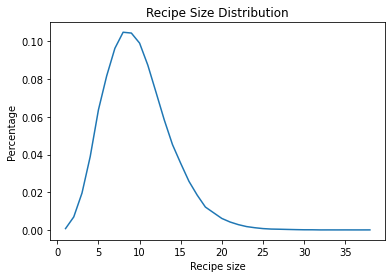

In [ ]:
sorted_list = sorted(size_numRecipes.keys())
y_list = []
for r in sorted_list:
  y_list.append(size_numRecipes[r]/len(df.index))
  x_axis = sorted_list
  y_axis = y_list
plt.ylabel('Percentage')
plt.xlabel('Recipe size')
plt.title('Recipe Size Distribution')
plt.plot(x_axis, y_axis)

Function to plot recipe size distribution for different categories

In [ ]:
def recipeSizeDistribution_(category, s, data):
  legend = []
  for continent in category:
    total_recipes = 0
    recipeSize_num = {}
    legend.append(continent)
    for index,row in data.iterrows():
      if row[s]==continent:
        total_recipes += 1
        ing_list = str(row['ingredients']).split(',')
        if len(ing_list) in recipeSize_num:
          recipeSize_num[len(ing_list)] += 1
        else:
          recipeSize_num[len(ing_list)] = 1
    for r in recipeSize_num:
      recipeSize_num[r] = recipeSize_num[r]/total_recipes
    sorted_list = sorted(recipeSize_num.keys())
    y_list = []
    for r in sorted_list:
        y_list.append(recipeSize_num[r])
      # Plotting every cuisine
    x_axis = sorted_list
    y_axis = y_list
    plt.plot(x_axis, y_axis)
  plt.xlabel("Recipe size")
  plt.ylabel("Percentage")
  plt.title("Recipe Size Distribution")
  plt.legend(legend, bbox_to_anchor = (1.05, 0.6))
  plt.show()

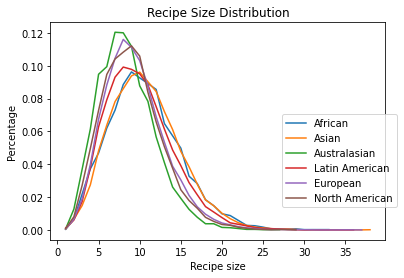

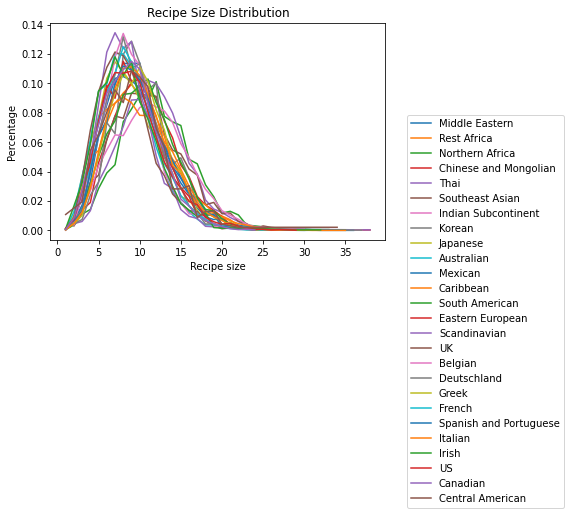

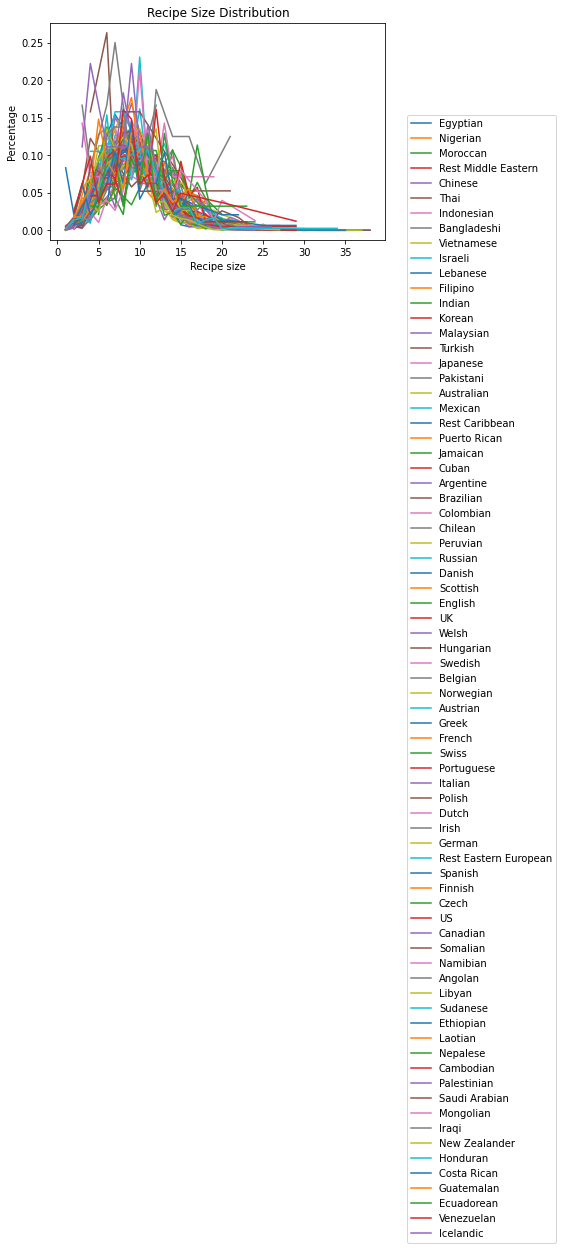

In [ ]:
recipeSizeDistribution_(continents, 'Continent', dataframe)
recipeSizeDistribution_(regions, 'Region', dataframe)
recipeSizeDistribution_(sub_regions, 'Sub_region', dataframe)

# Frequency Rank Distribution

In [ ]:
def plot_frequencyRank(dataframe):
  d = {}
  for index,row in dataframe.iterrows():
    ingredients = str(row['ingredients']).split(',')
    for i in ingredients:
      if i in d:
        d[i] = d[i]+1
      else:
        d[i] = 1
  sorted_matrix = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
  sorted_dict = {}

  for i in range(len(sorted_matrix)):
    sorted_dict[i] = sorted_matrix[i][1]

  x_axis = list(sorted_dict.keys())
  y_axis = list(sorted_dict.values())

  plt.loglog(x_axis,y_axis, label = "frequency rank distribution")
  plt.legend()
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.title("Frequency Rank Distribution for all recipes")
  plt.show()

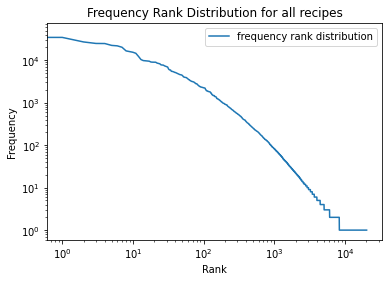

In [ ]:
plot_frequencyRank(df)

In [ ]:
def category_frequencyDistribution(category, s, num_ingredients, num_recipes):
  legend = []
  for c in category:
    index_ = category.index(c)
    legend.append(c)
    d = {}
    for index,row in df.iterrows():
      if row[s]==c:
        num_recipes[index_] += 1
        ingredients = str(row['ingredients']).split()
        for i in ingredients:
          if i in d:
            d[i] = d[i]+1
          else:
            d[i] = 1
    num_ingredients.append(len(d))
    sorted_matrix = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
    sorted_dict = {}

    for i in range(len(sorted_matrix)):
      sorted_dict[i] = sorted_matrix[i][1]

    x_axis = list(sorted_dict.keys())
    y_axis = list(sorted_dict.values())

    plt.loglog(x_axis,y_axis, label = "frequency rank distribution")
  plt.legend(legend, bbox_to_anchor = (1.05, 0.6))
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.title("Frequency Rank Distribution for all recipes")
  plt.show()  

In [ ]:
region_recipes = [0]*len(regions)
sub_region_recipes = [0]*len(sub_regions)
continent_recipes = [0]*len(continents)
region_ingredients = []
sub_region_ingredients = []
continent_ingredients = []

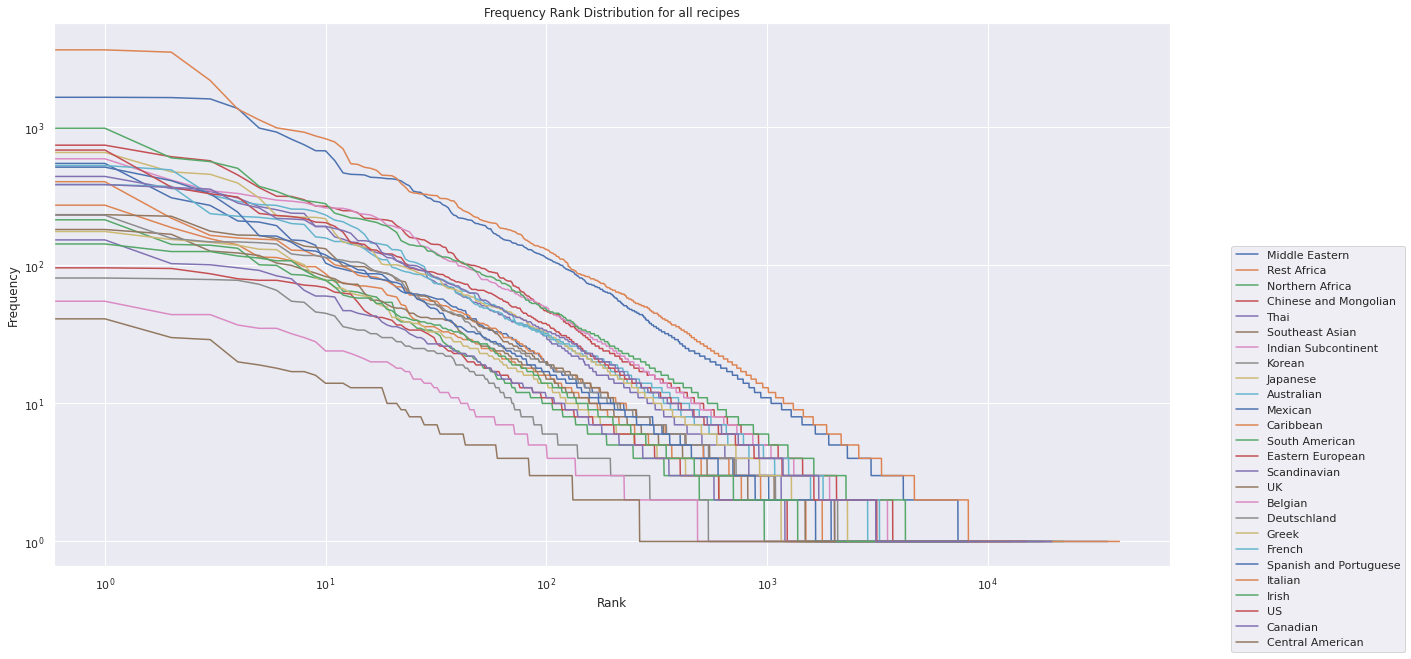

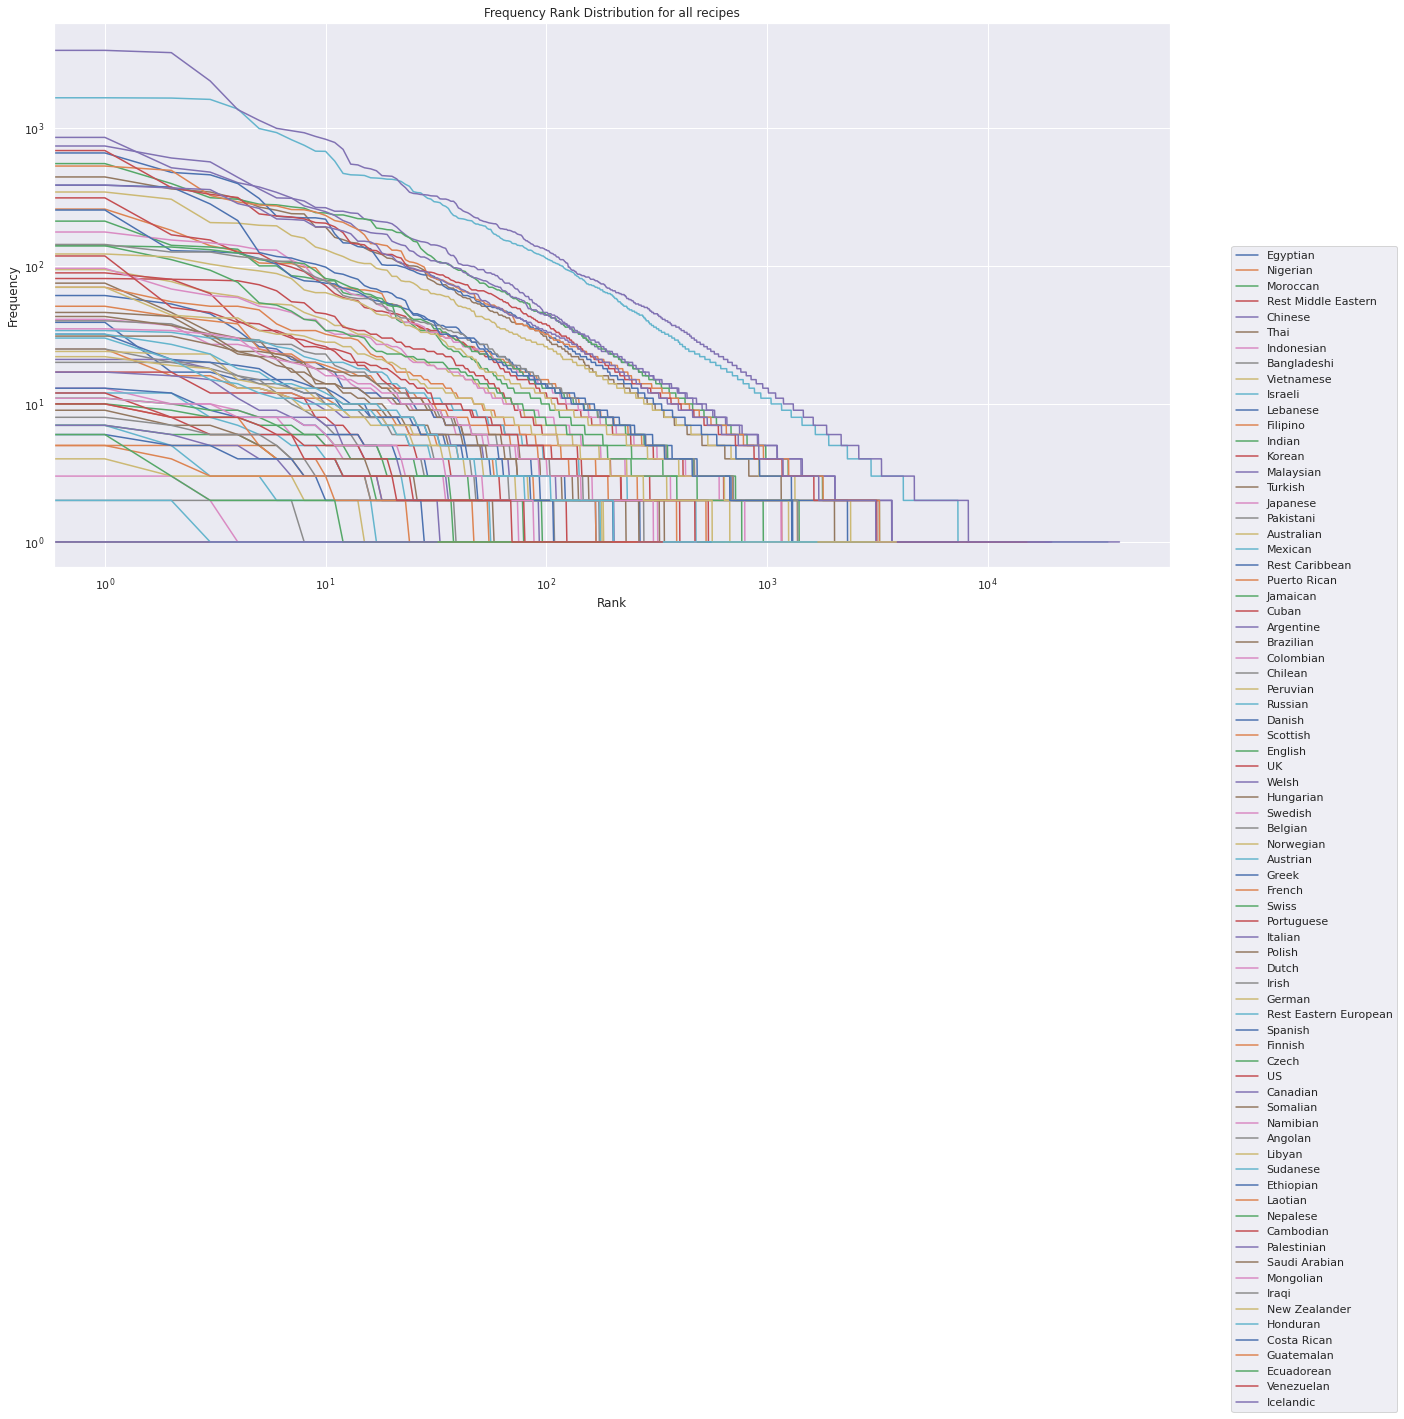

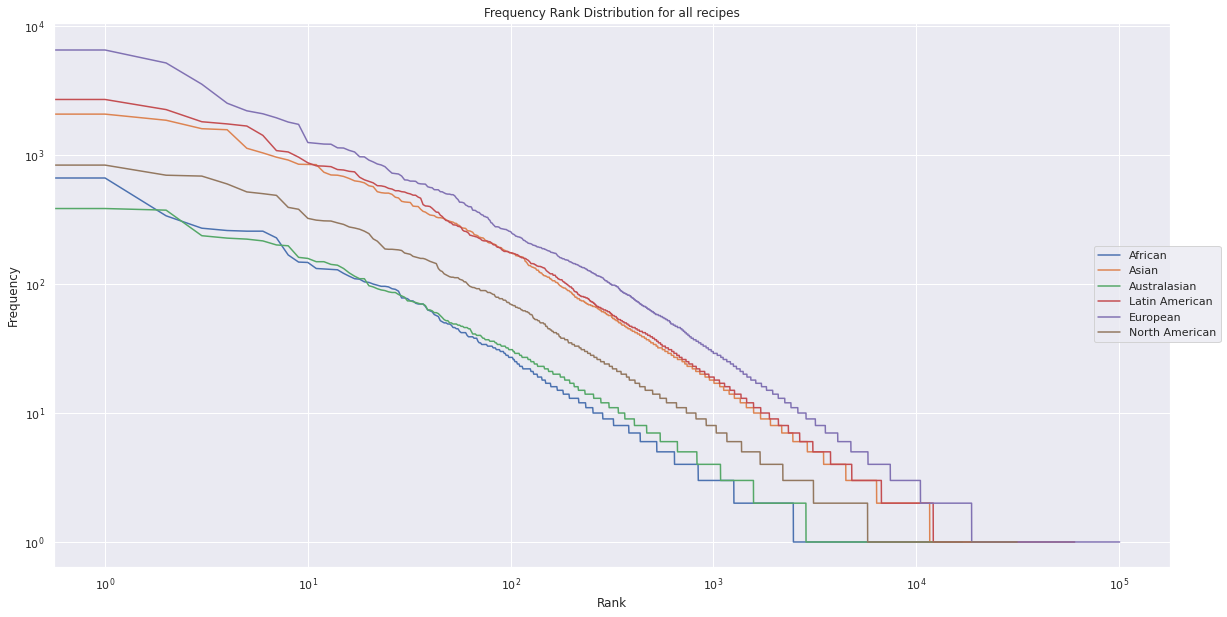

In [ ]:
category_frequencyDistribution(regions, 'Region', region_ingredients, region_recipes)
category_frequencyDistribution(sub_regions, 'Sub_region', sub_region_ingredients, sub_region_recipes)
category_frequencyDistribution(continents, 'Continent', continent_ingredients, continent_recipes)

# Compositions of recipes in terms of various ingredient categories

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/RecipeDB/Dataset/New_Unique_Ing_with_ID.csv") 
# print(df4.head(1))
for col in df4.columns:
    print(col)

IngID
new_name
new_frequency
similarity_achieved
old_ing_id
old_ing_name
old_frequency
generic_name
wikilink
wikiimage
Doubt
10
FlavorDB_Category
Dietrx_Category
New_Category
Flavor_DB_Link
Diet_rx_link


In [ ]:
df4.iloc[0]['Flavor_DB_Link']

'Salt~https://cosylab.iiitd.edu.in/flavordb/entity_details?id=778'

In [ ]:
df4['Dietrx_Category'].isnull().sum()

965

In [ ]:
df4.dropna(subset = ["Dietrx_Category"], inplace=True)

In [ ]:
df4.shape

(19318, 17)

In [ ]:
categories = df4['Dietrx_Category'].tolist()
unique_categories = []
for c in categories:
  if c not in unique_categories:
    unique_categories.append(c)

print(unique_categories)

['Additive-Salt', 'Vegetable', 'Dairy', 'Herb', 'Plant Derivative', 'Additive-Sugar', 'Meat', 'Spice', 'Cereal', 'Additive', 'Beverage', 'Condiment', 'Fruit', 'Fungi', 'Plant', 'Maize', 'Beverage-Alcoholic', 'Nuts and Seeds', 'Legume', 'Essential Oil', 'Seafood', 'Bakery', 'Additive-Vinegar', 'Additive-Yeast', 'Dish', 'Fish', 'Flower', 'MISC-Other', 'MISC-Utensil', 'dish']


In [ ]:
j = 0
for p in unique_categories:
  print(str(j)+" "+p)
  j+=1 

0 Additive-Salt
1 Vegetable
2 Dairy
3 Herb
4 Plant Derivative
5 Additive-Sugar
6 Meat
7 Spice
8 Cereal
9 Additive
10 Beverage
11 Condiment
12 Fruit
13 Fungi
14 Plant
15 Maize
16 Beverage-Alcoholic
17 Nuts and Seeds
18 Legume
19 Essential Oil
20 Seafood
21 Bakery
22 Additive-Vinegar
23 Additive-Yeast
24 Dish
25 Fish
26 Flower
27 MISC-Other
28 MISC-Utensil
29 dish


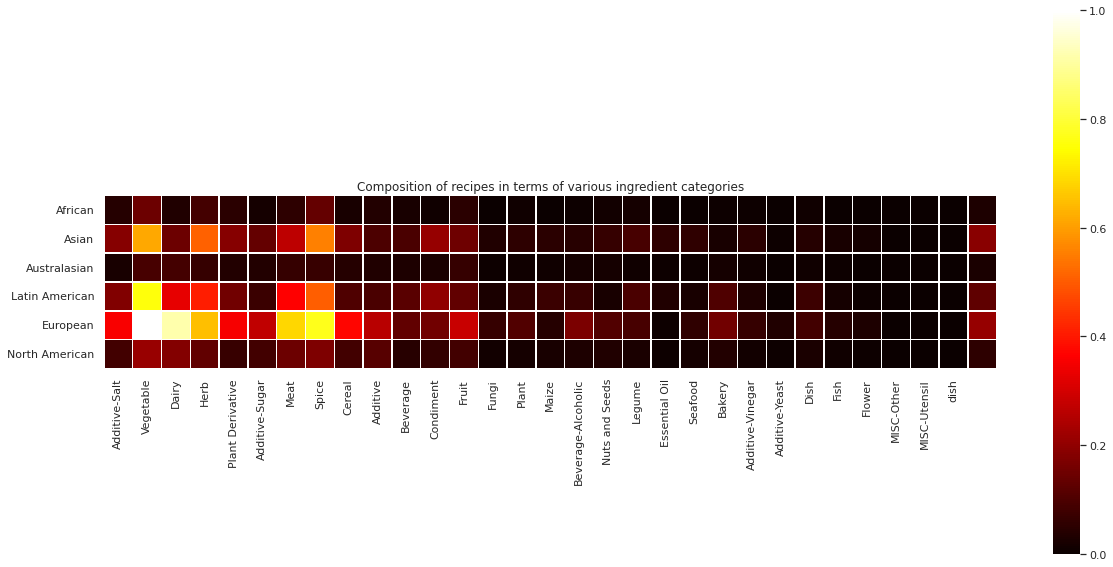

In [ ]:
heatmap = np.zeros((len(unique_categories)+1,len(continents)))
all_ingredients = df4['new_name'].tolist()
corres_categories = df4['Dietrx_Category'].tolist()

for index,row in df.iterrows():
  continent_index = continents.index(row['Continent'])
  ingredient_list = str(row['ingredients']).split(',')
  for ing in ingredient_list:
    if ing not in all_ingredients:
      final_index = len(unique_categories)
    else:
      ingredient_index = all_ingredients.index(ing)
      final_index = unique_categories.index(corres_categories[ingredient_index])
    heatmap[final_index][continent_index] += 1
heatmap = heatmap.transpose()
row, column = heatmap.shape
min = np.amin(heatmap)*1.0
max = np.amax(heatmap)*1.0
for r in range(row):
  for c in range(column):
    heatmap[r][c] = (heatmap[r][c]-min)/(max-min)
x_axis = unique_categories
y_axis = continents
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.heatmap(heatmap, xticklabels=x_axis, yticklabels=y_axis, linewidth = 0.5, cmap = 'hot', square=True)
plt.title( "Composition of recipes in terms of various ingredient categories")
plt.show()

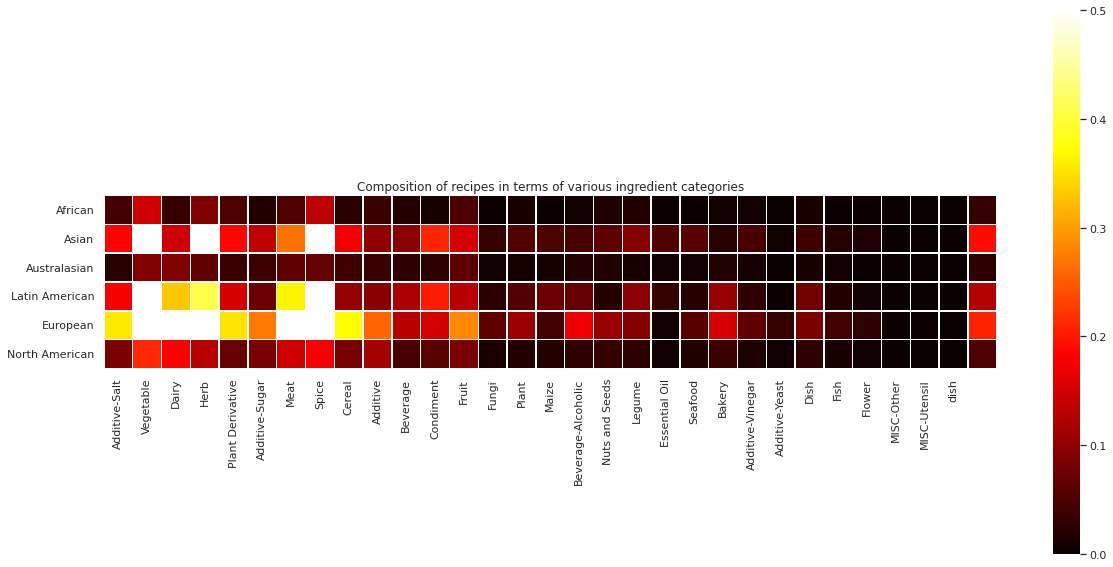

In [ ]:
ax = sns.heatmap(heatmap, xticklabels=x_axis, yticklabels=y_axis, vmin = 0, vmax = 0.5, linewidth = 0.5, cmap = 'hot', square=True)
plt.title( "Composition of recipes in terms of various ingredient categories")
plt.show()

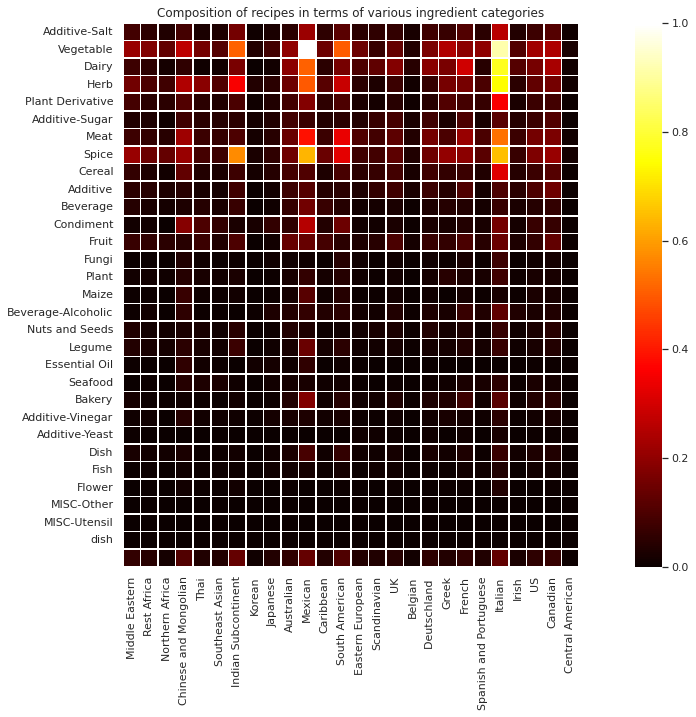

In [ ]:
heatmap = np.zeros((len(unique_categories)+1,len(regions)))
all_ingredients = df4['new_name'].tolist()
corres_categories = df4['Dietrx_Category'].tolist()

for index,row in df.iterrows():
  continent_index = regions.index(row['Region'])
  ingredient_list = str(row['ingredients']).split(',')
  for ing in ingredient_list:
    if ing not in all_ingredients:
      final_index = len(unique_categories)
    else:
      ingredient_index = all_ingredients.index(ing)
      final_index = unique_categories.index(corres_categories[ingredient_index])
    heatmap[final_index][continent_index] += 1

row, column = heatmap.shape
min = np.amin(heatmap)*1.0
max = np.amax(heatmap)*1.0
for r in range(row):
  for c in range(column):
    heatmap[r][c] = (heatmap[r][c]-min)/(max-min)
x_axis = regions
y_axis = unique_categories
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.heatmap(heatmap, xticklabels=x_axis, yticklabels=y_axis, linewidth = 0.5, cmap = 'hot', square=True)
plt.title( "Composition of recipes in terms of various ingredient categories")
plt.show()

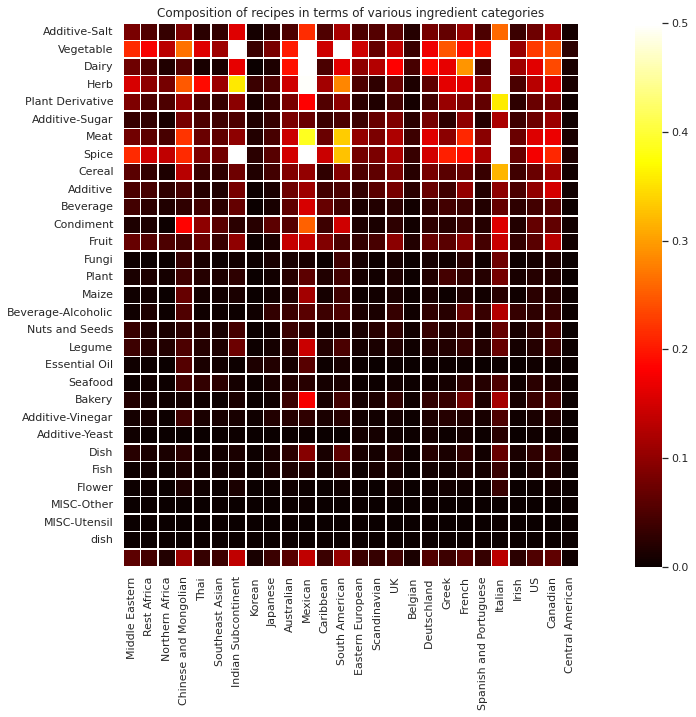

In [ ]:
ax = sns.heatmap(heatmap, xticklabels=x_axis, yticklabels=y_axis, vmin=0, vmax = 0.5, linewidth = 0.5, cmap = 'hot', square=True)
plt.title( "Composition of recipes in terms of various ingredient categories")
plt.show()

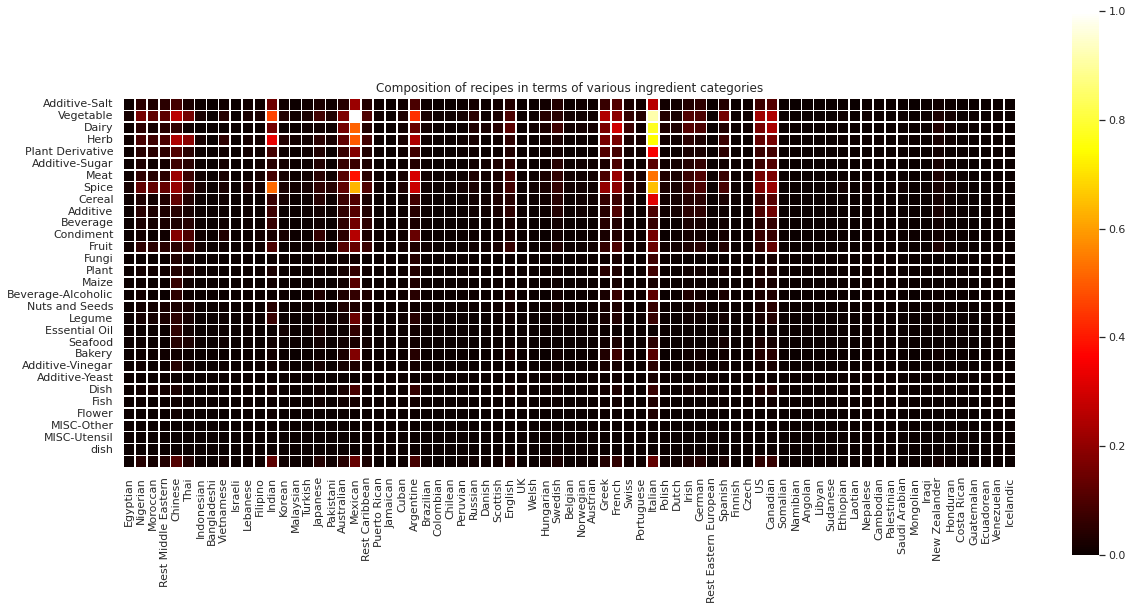

In [ ]:
heatmap = np.zeros((len(unique_categories)+1,len(sub_regions)))
all_ingredients = df4['new_name'].tolist()
corres_categories = df4['Dietrx_Category'].tolist()

for index,row in df.iterrows():
  continent_index = sub_regions.index(row['Sub_region'])
  ingredient_list = str(row['ingredients']).split(',')
  for ing in ingredient_list:
    if ing not in all_ingredients:
      final_index = len(unique_categories)
    else:
      ingredient_index = all_ingredients.index(ing)
      final_index = unique_categories.index(corres_categories[ingredient_index])
    heatmap[final_index][continent_index] += 1

row, column = heatmap.shape
min = np.amin(heatmap)*1.0
max = np.amax(heatmap)*1.0
for r in range(row):
  for c in range(column):
    heatmap[r][c] = (heatmap[r][c]-min)/(max-min)
x_axis = sub_regions
y_axis = unique_categories
sns.set(rc = {'figure.figsize':(20,10)})
ax = sns.heatmap(heatmap, xticklabels=x_axis, yticklabels=y_axis, linewidth = 0.5, cmap = 'hot', square=True)
plt.title( "Composition of recipes in terms of various ingredient categories")
plt.show()

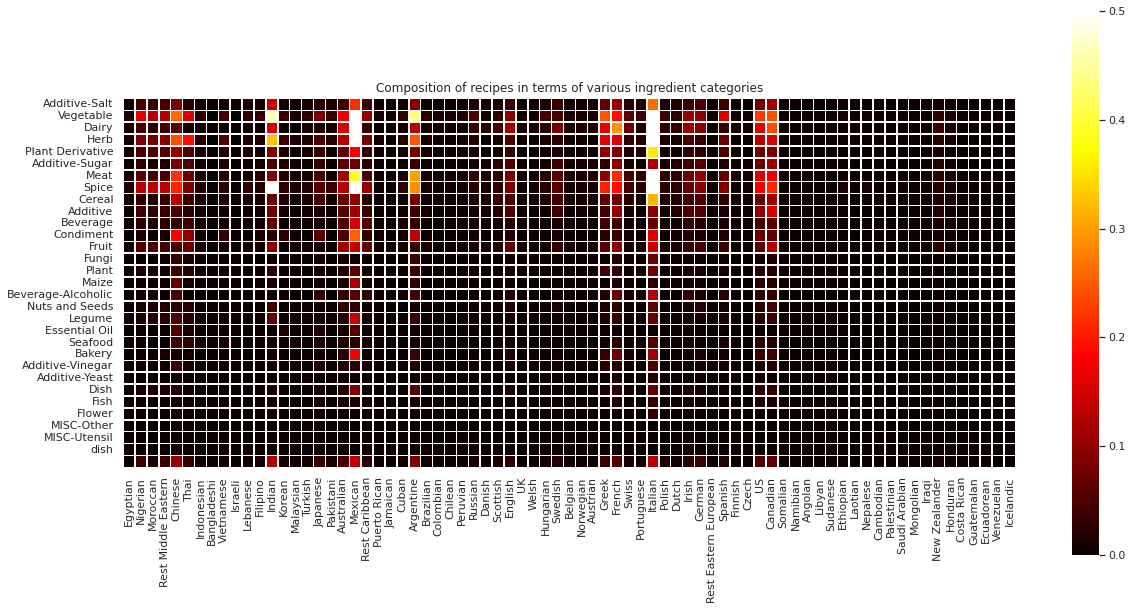

In [ ]:
ax = sns.heatmap(heatmap, xticklabels=x_axis, yticklabels=y_axis, vmin = 0, vmax = 0.5, linewidth = 0.5, cmap = 'hot', square=True)
plt.title( "Composition of recipes in terms of various ingredient categories")
plt.show()

# Statistics of recipes and ingredients across world cuisines.

In [ ]:
stat_region = pd.DataFrame(list(zip(regions, region_recipes, region_ingredients)),
               columns =['Region', 'Recipes', 'Ingredients'])
stat_region.index += 1
print(stat_region)

                    Region  Recipes  Ingredients
1           Middle Eastern     3905         2016
2              Rest Africa     2740         1904
3          Northern Africa     1611         1209
4    Chinese and Mongolian     5896         2933
5                     Thai     2605         1852
6          Southeast Asian     1940         1659
7      Indian Subcontinent     6464         2654
8                   Korean      668          843
9                 Japanese     2041         1669
10              Australian     5823         3075
11                 Mexican    14463         5059
12               Caribbean     3026         2230
13          South American     7176         3486
14        Eastern European     2503         1673
15            Scandinavian     2811         1698
16                      UK     4401         2674
17                 Belgian     1060         1144
18            Deutschland      4323         2549
19                   Greek     4185         2154
20                  

In [ ]:
stat_sub_region = pd.DataFrame(list(zip(sub_regions, sub_region_recipes, sub_region_ingredients)),
               columns =['Sub-region', 'Recipes', 'Ingredients'])
stat_sub_region.index += 1
print(stat_sub_region)

               Sub-region  Recipes  Ingredients
0                Egyptian      325          500
1                Nigerian     2526         1834
2                Moroccan     1574         1191
3     Rest Middle Eastern     2300         1534
4                 Chinese     5821         2919
5                    Thai     2605         1852
6              Indonesian      375          622
7             Bangladeshi       16           87
8              Vietnamese      708          935
9                 Israeli       26          105
10               Lebanese      472          613
11               Filipino      543          732
12                 Indian     5988         2585
13                 Korean      668          843
14              Malaysian      227          545
15                Turkish      431          610
16               Japanese     2041         1669
17              Pakistani      372          486
18             Australian     4689         2804
19                Mexican    14463      

In [ ]:
stat_continent = pd.DataFrame(list(zip(continents, continent_recipes, continent_ingredients)),
               columns =['Continent', 'Recipes', 'Ingredients'])
stat_continent.index += 1
print(stat_continent)

        Continent  Recipes  Ingredients
1         African     4676         2405
2           Asian    23194         6762
3    Australasian     5823         3075
4  Latin American    25125         7507
5        European    47622        10547
6  North American    11731         5033


# Understanding FlavorDB

In [4]:
f5 = pd.read_csv('/content/drive/MyDrive/FlavorDB/fdb_molecules_entities.csv')
f5.head(10)

,id,fdb_molecules_id,fdb_entities_id
0,40,4,42
1,279,49,2
2,377,49,9
3,610,49,63
4,761,49,79
5,909,49,167
6,1140,49,283
7,1473,49,371
8,492,58,9
9,1579,58,48


In [5]:
f2 = pd.read_csv('/content/drive/MyDrive/FlavorDB/fdb_entities.csv')
f2.head(2)

,entity_id,category,category_readable,entity_alias,entity_alias_basket,entity_alias_readable,entity_alias_synonyms,entity_alias_url,natural_source_name,natural_source_url
0,0,animalproduct,Animal Product,egg,"egg, egg-boiled, egg-cooked, egg-scrambled",Egg,Egg,https://en.wikipedia.org/wiki/Egg_as_food,Chicken,https://en.wikipedia.org/wiki/Chicken
1,1,bakery,Bakery,bakery,bakery-products,Bakery Products,Bakery Products,https://en.wikipedia.org/wiki/Bakery,Poacceae,https://en.wikipedia.org/wiki/Poaceae


In [7]:
f2.iloc[934]

entity_id                                                         977
category                                                         meat
category_readable                                                Meat
entity_alias                                                      NaN
entity_alias_basket                                               NaN
entity_alias_readable                                      Guinea hen
entity_alias_synonyms    Pet speckled hen, original fowl, Guinea fowl
entity_alias_url             https://en.wikipedia.org/wiki/Guinea_hen
natural_source_name                                       Galliformes
natural_source_url          https://en.wikipedia.org/wiki/Galliformes
Name: 934, dtype: object

In [8]:
f2['entity_alias'].isna().sum()

530

In [9]:
f2['entity_alias_readable'].isna().sum()

0

In [6]:
fdb = f2.loc[0:,['entity_id', 'entity_alias']]
fdb

,entity_id,entity_alias
0,0,egg
1,1,bakery
2,2,bread
3,3,bread-rye
4,4,bread-wheaten
...,...,...
931,970,NaN
932,971,NaN
933,972,NaN
934,977,NaN


# Random controls



In [12]:
df_ingredients = []
for u in range(len(df)):
  df_ingredients.append(str(df.iloc[u]['ingredients']).split(','))

s = []
for l in df_ingredients:
  s.append(len(l))

df['length'] = s
# df.sort_values()
df = df.sort_values('length',ascending=False)

In [13]:
# creating the ingredients basket
ingredient_basket = []
for ingredient_list in df_ingredients:
  for ingredient in ingredient_list:
    if ingredient in ingredient_basket:
      pass
    else:
      ingredient_basket.append(ingredient)

In [14]:
print(len(ingredient_basket))

20283


In [ ]:
# calculate frequency of each ingredient
ingredient_frequency = {}
for index,row in df.iterrows():
  ingredient_list = str(row['ingredients']).split(',')
  for ingredient in ingredient_list:
    if ingredient in ingredient_frequency:
      ingredient_frequency[ingredient] = ingredient_frequency[ingredient]+1
    else:
      ingredient_frequency[ingredient] = 1

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df['ingredients'] = df_ingredients

Frequency

In [ ]:
def create_RandomCuisine_frequency():
  # creating the ingredients basket
  ingredient_basket = []
  for ingredient_list in df_ingredients:
    for ingredient in ingredient_list:
      if ingredient in ingredient_basket:
        pass
      else:
        ingredient_basket.append(ingredient)
  weighted = []
  for ingredient in ingredient_basket:
    weighted.append(ingredient_frequency[ingredient])
  new_df = {'id':[],'continent':[], 'region':[], 'sub_region':[], 'ingredients':[]}
# iterating over all the recipes
  for index,row in df.iterrows():
    size = len(row['ingredients'])
    new_recipe = []
    hell = False

  # sampling ingredients for the recipes using weighted probability
    for i in range(size):
      ingredient = random.choices(ingredient_basket, weights=weighted, k=1)[0]
      index = ingredient_basket.index(ingredient)
      frequency = weighted[index]-1
      if frequency==0:
        weighted.pop(index)
        ingredient_basket.pop(index)
      else:
        weighted[index] = weighted[index]-1
      new_recipe.append(ingredient)
  
    new_df['id'].append(row['Recipe_id'])
    new_df['continent'].append(row['Continent'])
    new_df['region'].append(row['Region'])
    new_df['sub_region'].append(row['Sub_region'])
    new_df['ingredients'].append(new_recipe)

  new_df = pd.DataFrame(new_df)
  return new_df